In [1]:
import numpy as np
from skimage.io import imread, imsave
from skimage.data import cells3d
from skimage.filters import gaussian
from scipy.ndimage import convolve
from napari_simpleitk_image_processing import richardson_lucy_deconvolution
import matplotlib.pyplot as plt

In [2]:
from skimage import img_as_float
import imageio.v2 as iio
image = img_as_float(iio.imread("cells3d.tif"))[:,1,119:190,79:150]
# imshow(image)

(-0.5, 70.5, 70.5, -0.5)

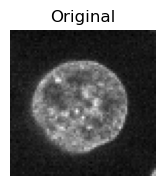

In [3]:
plt.subplot(1, 3, 1)
plt.imshow(image[30], cmap='gray')
plt.title('Original')
plt.axis('off')  # Ocultar los ejes para una mejor visualización

(-0.5, 70.5, 70.5, -0.5)

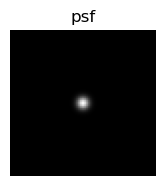

In [4]:
perfect_psf = np.zeros( (61,71,71) )
perfect_psf[31,35,35] = 1
psf = gaussian(perfect_psf, sigma=2)

plt.subplot(1, 3, 1)
plt.imshow(psf[31], cmap='gray')
plt.title('psf')
plt.axis('off')  # Ocultar los ejes para una mejor visualización

(-0.5, 70.5, 70.5, -0.5)

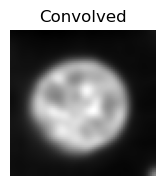

In [5]:
convolved = convolve(image, psf)

plt.subplot(1, 3, 1)
plt.imshow(convolved[30], cmap='gray')
plt.title('Convolved')
plt.axis('off') 

In [6]:
convolved.shape

(60, 71, 71)

(-0.5, 70.5, 70.5, -0.5)

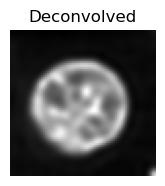

In [7]:
number_of_iterations = 30
deconvolved = richardson_lucy_deconvolution(convolved, psf, number_of_iterations)

plt.subplot(1, 3, 1)
plt.imshow(deconvolved[30], cmap='gray')
plt.title('Deconvolved')
plt.axis('off') 

In [8]:
%timeit -n 1 -r 10  richardson_lucy_deconvolution(convolved, psf, number_of_iterations)

19.7 s ± 58.5 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
